In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
# Load Iris dataset
iris = load_iris()

# Extract features and target
X, y = iris.data, iris.target

In [32]:
display(iris.data[45:55], iris.target[45:55])

array([[4.8, 3. , 1.4, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [4.6, 3.2, 1.4, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [5. , 3.3, 1.4, 0.2],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5]])

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [33]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [34]:
# Instantiate KNeighborsClassifier with k=3
classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the model
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

In [35]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
display(cm)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print('Accuracy of our model is equal to {:.2f}%.'.format(accuracy))

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Accuracy of our model is equal to 100.00%.


In [36]:
# Determine the optimal number of neighbors
k_list = list(range(1, 50, 2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

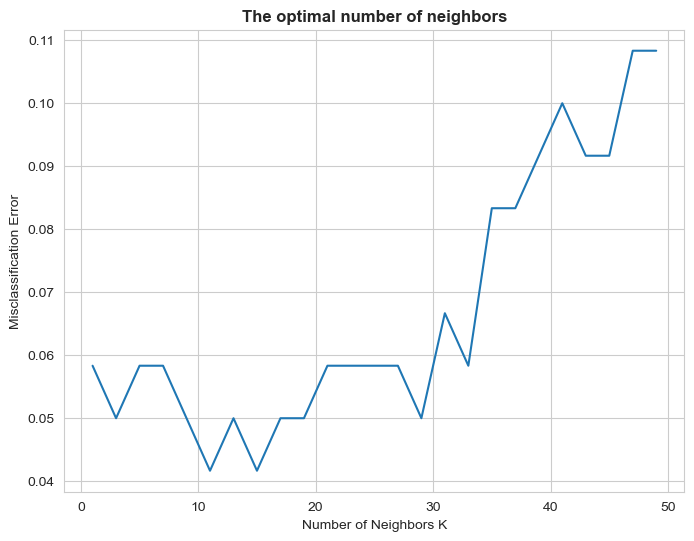

In [37]:
# Calculate Misclassification Error
MSE = [1 - x for x in cv_scores]

# Plot Misclassification Error vs. Number of Neighbors
plt.figure(figsize=(8, 6))
plt.title('The optimal number of neighbors', fontsize=12, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=10)
plt.ylabel('Misclassification Error', fontsize=10)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

In [38]:
# Determine the best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is", best_k)

The optimal number of neighbors is 11


In [49]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

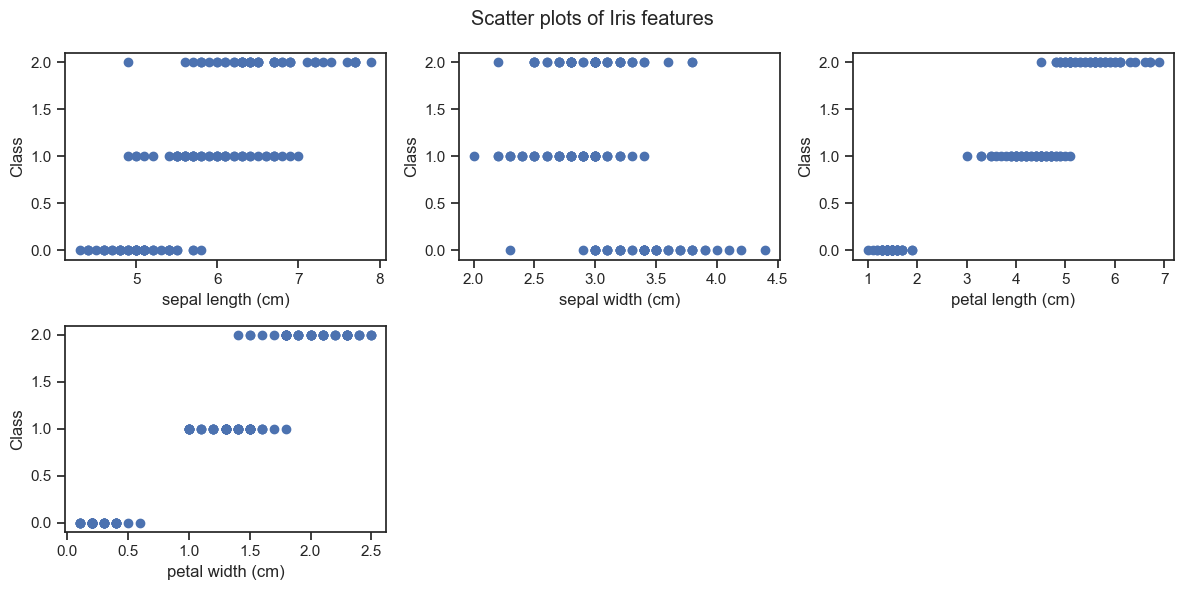

In [58]:
# Scatter plots
plt.figure(figsize=(12, 6))
for i in range(X.shape[1]):
    plt.subplot(2, 3, i+1)
    plt.scatter(X[:, i], y)
    plt.xlabel(feature_names[i])
    plt.ylabel('Class')
plt.suptitle('Scatter plots of Iris features')
plt.tight_layout()
plt.show()

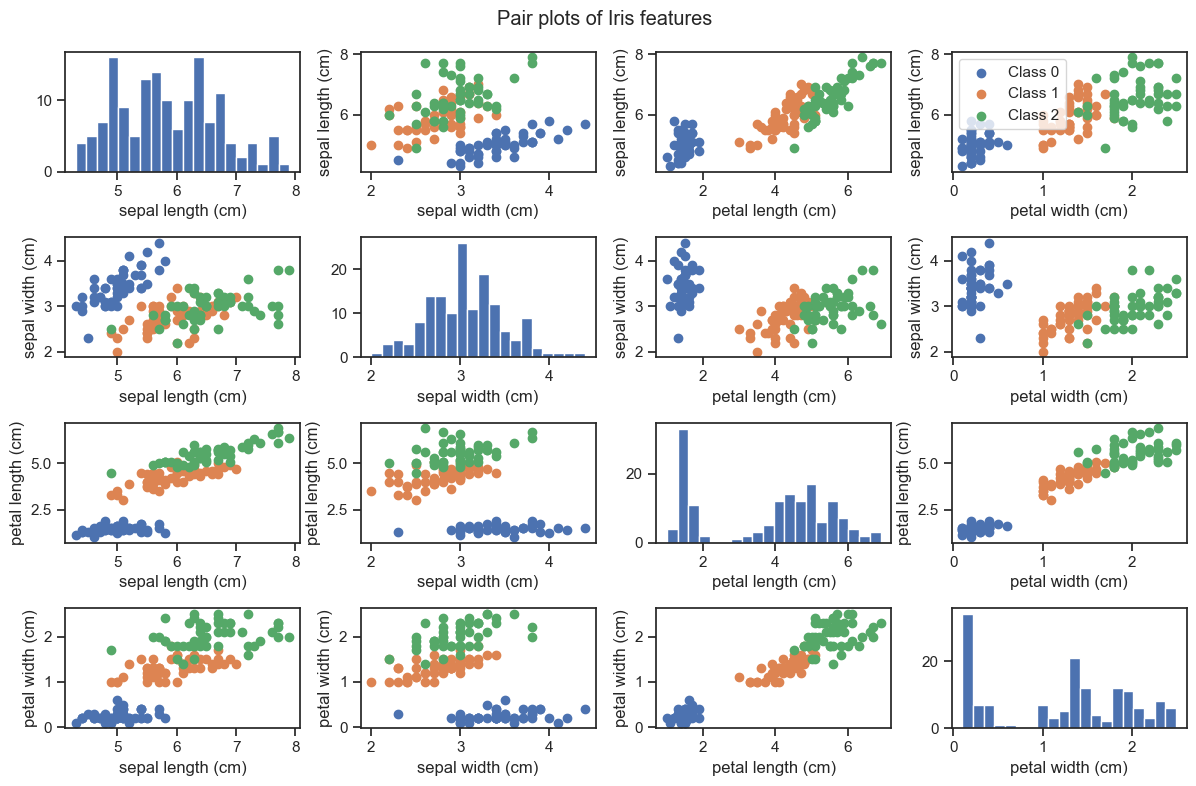

In [59]:
# Pair plots
plt.figure(figsize=(12, 8))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        plt.subplot(X.shape[1], X.shape[1], i*X.shape[1] + j + 1)
        if i == j:
            plt.hist(X[:, i], bins=20)
            plt.xlabel(feature_names[i])
        else:
            for c in np.unique(y):
                plt.scatter(X[y==c, j], X[y==c, i], label=f'Class {c}')
            plt.xlabel(feature_names[j])
            plt.ylabel(feature_names[i])
        if i == 0 and j == X.shape[1]-1:
            plt.legend()
plt.suptitle('Pair plots of Iris features')
plt.tight_layout()
plt.show()

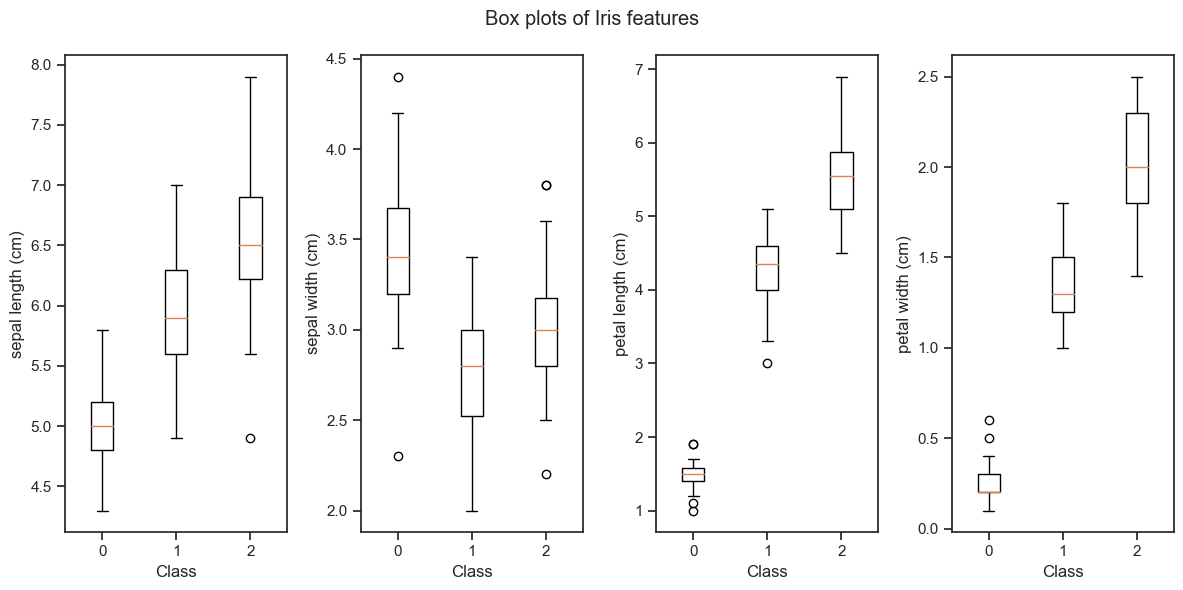

In [60]:
# Box plots
plt.figure(figsize=(12, 6))
for i in range(X.shape[1]):
    plt.subplot(1, X.shape[1], i+1)
    plt.boxplot([X[y==c, i] for c in np.unique(y)], labels=np.unique(y))
    plt.xlabel('Class')
    plt.ylabel(feature_names[i])
plt.suptitle('Box plots of Iris features')
plt.tight_layout()
plt.show()

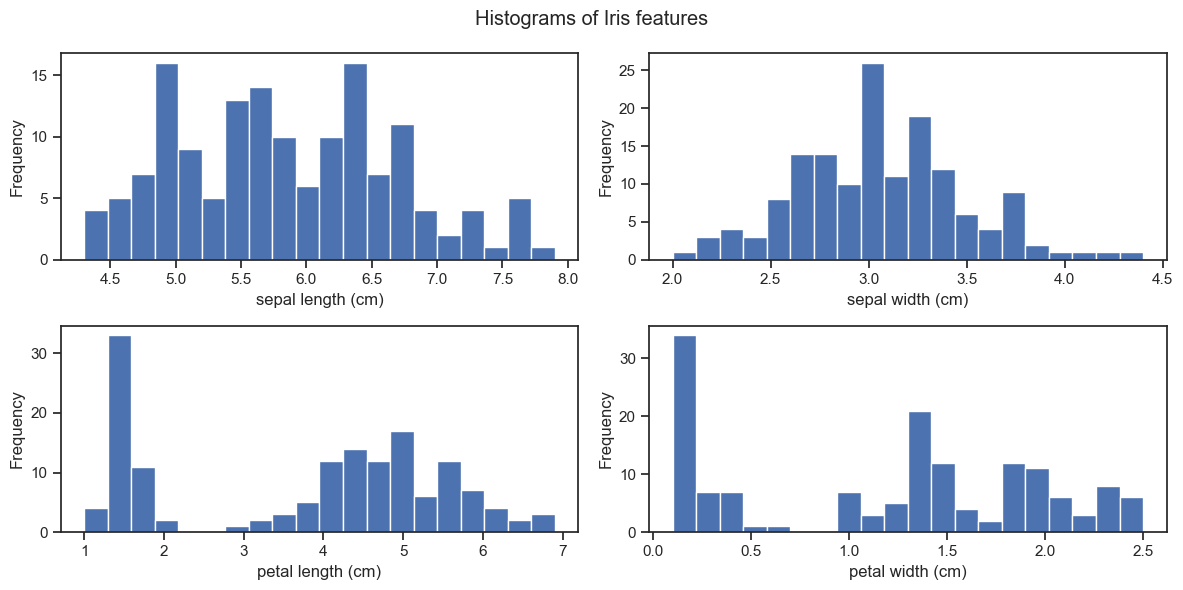

In [61]:
# Histograms
plt.figure(figsize=(12, 6))
for i in range(X.shape[1]):
    plt.subplot(2, 2, i+1)
    plt.hist(X[:, i], bins=20)
    plt.xlabel(feature_names[i])
    plt.ylabel('Frequency')
plt.suptitle('Histograms of Iris features')
plt.tight_layout()
plt.show()

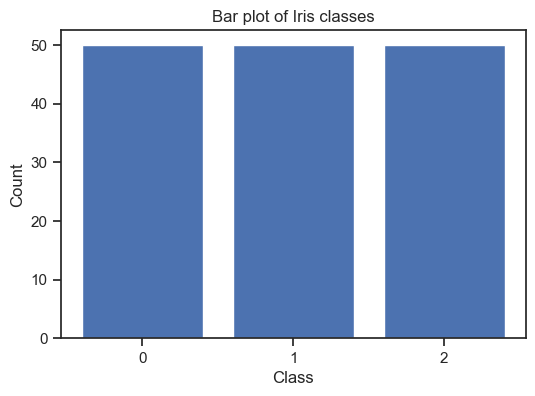

In [54]:
# Bar plots
plt.figure(figsize=(6, 4))
plt.bar(np.unique(y), np.bincount(y))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar plot of Iris classes')
plt.xticks(np.unique(y))
plt.show()

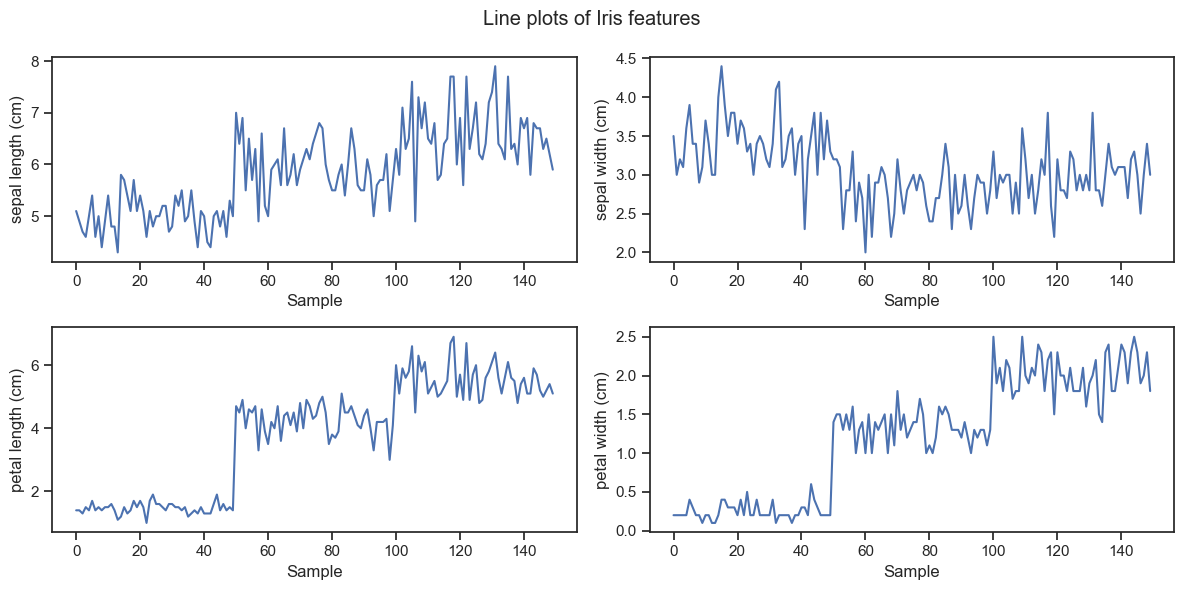

In [62]:
# Line plots
plt.figure(figsize=(12, 6))
for i in range(X.shape[1]):
    plt.subplot(2, 2, i+1)
    plt.plot(X[:, i])
    plt.xlabel('Sample')
    plt.ylabel(feature_names[i])
plt.suptitle('Line plots of Iris features')
plt.tight_layout()
plt.show()

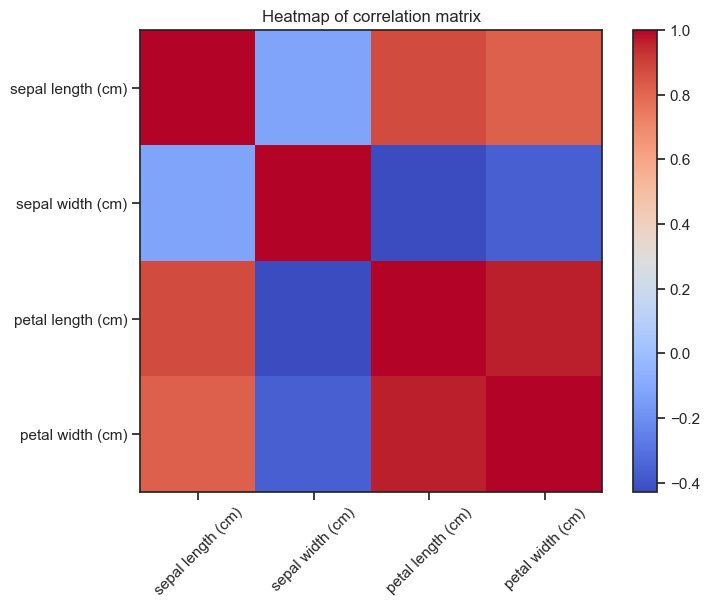

In [63]:
# Heatmap
plt.figure(figsize=(8, 6))
corr = np.corrcoef(X.T)
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=45)
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.title('Heatmap of correlation matrix')
plt.show()